In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Extract recurrent mobility matrix

First, the raw spreadsheet `data/raw/census_2011/Pop_LPW_NL_25FEB15.xlsx` was modified in MS Excel. The format of the data is as follows:

- rows: municipality of residence
- columns: municipality of work

The dataset contained, for each Belgian province, a column of 'unknowns', indicating we know where these individuals live but not where they work. These 10 columns were removed manually. Further, the column `Werkt in Belgie` was renamed `Belgie` to make name-based row and column matching easier. The resulting dataset was placed in `data/raw/census_2011/Pop_LPW_NL_25FEB15_remove_unknowns.xlsx`. The recurrent mobility matrix extracted from the resulting spreadsheet thus has two assumptions,

- People working abroad are ignored. These 92.000 individuals account for 2% of the working population.
- People whos workplace is unknown are ignored. An alternative assumptions could be the following: the unknowns work in their place of residence.

In [2]:
import os
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/interim/census_2011/Pop_LPW_NL_25FEB15_delete_unknown.xlsx')
df = pd.read_excel(rel_dir, sheet_name="Tabel1_2011")

In [3]:
codes=df['00.24 - Werkende bevolking volgens geslacht, verblijfplaats en plaats van tewerkstelling'].loc[5:1942].dropna().values
mobility_df=pd.DataFrame(np.zeros([len(codes),len(codes)]),index=codes,columns=codes)

rows=[]
for i in df['00.24 - Werkende bevolking volgens geslacht, verblijfplaats en plaats van tewerkstelling'].loc[5:1942].dropna().index:
    rows.append(df.iloc[i+2,4:-1].values)

matrix = np.zeros([len(rows),len(rows)])
for j in range(len(rows)):
    matrix[j,:]=rows[j]

In [4]:
mobility_df=pd.DataFrame(matrix,index=codes,columns=codes)
mobility_df.head()

,01000,02000,03000,04000,10000,11000,11001,11002,11004,11005,...,92141,92142,93000,93010,93014,93018,93022,93056,93088,93090
01000,4340675.0,2500219.0,1145273.0,695183.0,752499.0,440273.0,9540.0,265777.0,3684.0,6294.0,...,1169.0,8407.0,15126.0,482.0,3684.0,351.0,3878.0,3057.0,2786.0,888.0
02000,2692891.0,2391573.0,46578.0,254740.0,732539.0,427316.0,8706.0,256951.0,3643.0,6043.0,...,11.0,527.0,221.0,2.0,53.0,2.0,57.0,75.0,29.0,3.0
03000,1279677.0,64835.0,1075792.0,139050.0,12335.0,8008.0,591.0,5305.0,31.0,150.0,...,1150.0,7653.0,14824.0,478.0,3612.0,349.0,3784.0,2970.0,2747.0,884.0
04000,368107.0,43811.0,22903.0,301393.0,7625.0,4949.0,243.0,3521.0,10.0,101.0,...,8.0,227.0,81.0,2.0,19.0,0.0,37.0,12.0,10.0,1.0
10000,733602.0,689937.0,7151.0,36514.0,614859.0,359572.0,6171.0,210903.0,3407.0,5012.0,...,0.0,98.0,56.0,2.0,8.0,0.0,16.0,22.0,7.0,1.0


In [5]:
idx_arrondisement=[]
for idx in mobility_df.index:
    if ((str(idx)[-3:] == '000') & (len(str(idx)) != 4) & (str(idx)[-4:] != '0000') & (str(idx)[0] != '0')):
        idx_arrondisement.append(idx)
print(idx_arrondisement)

['11000', '12000', '13000', '21000', '23000', '24000', '25000', '31000', '32000', '33000', '34000', '35000', '36000', '37000', '38000', '41000', '42000', '43000', '44000', '45000', '46000', '51000', '52000', '53000', '54000', '55000', '56000', '57000', '61000', '62000', '63000', '64000', '71000', '72000', '73000', '81000', '82000', '83000', '84000', '85000', '91000', '92000', '93000']


In [6]:
mobility_df.loc[idx_arrondisement,idx_arrondisement]

,11000,12000,13000,21000,23000,24000,25000,31000,32000,33000,...,72000,73000,81000,82000,83000,84000,85000,91000,92000,93000
11000,309701.0,17352.0,10928.0,19733.0,10141.0,3290.0,881.0,1274.0,31.0,160.0,...,612.0,375.0,80.0,26.0,26.0,42.0,14.0,51.0,549.0,28.0
12000,26260.0,75173.0,4745.0,11407.0,9906.0,5191.0,398.0,378.0,17.0,63.0,...,228.0,216.0,33.0,14.0,9.0,21.0,5.0,13.0,201.0,8.0
13000,23611.0,7808.0,132162.0,5021.0,2396.0,5192.0,256.0,387.0,17.0,93.0,...,2271.0,351.0,45.0,19.0,16.0,37.0,4.0,27.0,204.0,20.0
21000,4949.0,2013.0,663.0,287021.0,25856.0,3047.0,12590.0,601.0,13.0,77.0,...,118.0,198.0,140.0,43.0,130.0,119.0,36.0,219.0,1889.0,81.0
23000,7637.0,6913.0,925.0,95532.0,112383.0,6187.0,5657.0,584.0,31.0,108.0,...,182.0,270.0,65.0,31.0,39.0,49.0,12.0,70.0,764.0,43.0
24000,7330.0,9078.0,4279.0,31528.0,20445.0,120806.0,2405.0,475.0,19.0,92.0,...,754.0,923.0,54.0,19.0,25.0,38.0,9.0,33.0,405.0,17.0
25000,1319.0,476.0,225.0,46501.0,7358.0,1590.0,78950.0,196.0,3.0,27.0,...,45.0,62.0,76.0,32.0,118.0,105.0,19.0,276.0,4024.0,121.0
31000,2511.0,510.0,396.0,5339.0,1164.0,596.0,243.0,86050.0,654.0,330.0,...,116.0,96.0,22.0,10.0,7.0,17.0,3.0,21.0,160.0,15.0
32000,213.0,77.0,54.0,379.0,123.0,96.0,43.0,2176.0,10520.0,1202.0,...,14.0,14.0,7.0,3.0,1.0,0.0,0.0,7.0,19.0,1.0
33000,445.0,125.0,99.0,833.0,345.0,163.0,42.0,783.0,1033.0,29326.0,...,44.0,20.0,3.0,4.0,3.0,6.0,2.0,8.0,25.0,2.0


In [9]:
mobility_df.loc[idx_arrondisement,idx_arrondisement].to_pickle('../../data/interim/census_2011/recurrent_mobility.pkl')

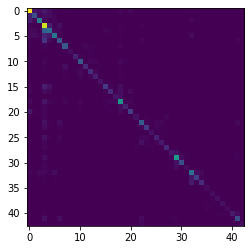

In [9]:
plt.imshow(mobility_df.loc[idx_arrondisement,idx_arrondisement])

## Extract population size (initN)

In [10]:
abs_dir = os.getcwd()
rel_dir = os.path.join(abs_dir, '../../data/raw/census_2011/census_demo_nl_04nov14.xlsx')
df = pd.read_excel(rel_dir, sheet_name="Tabel3_2011")

In [11]:
codes=df['00.04 - Bevolking van Belgische en vreemde nationaliteit naar geslacht en leeftijdsklasse'].loc[5:1943].dropna().values
columns = ['total','[0,10[','[10,20[','[20,30[','[30,40[','[40,50[','[50,60[','[60,70[','[70,80[','[80,inf[']
initN_df=pd.DataFrame(np.zeros([len(codes),len(columns)]),index=codes,columns=columns)
initN_df.head()

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
rows=np.zeros([len(codes),len(columns)])
k=0
for i in df['00.04 - Bevolking van Belgische en vreemde nationaliteit naar geslacht en leeftijdsklasse'].loc[5:1943].dropna().index:
    rows[k,0] = int(df.iloc[i+2,-1]) # total
    vals_raw = df.iloc[i+2,45:-1].values
    for j in range(len(vals_raw)-11):
        rows[k,j+1] = int(vals_raw[2*j]+vals_raw[2*j+1])
        if j == 8:
            rows[k,j+1] = int(sum(vals_raw[16:]))
    k = k + 1
    
initN_df=pd.DataFrame(rows,index=codes,columns=columns)
initN_df.tail()

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
93018,2896.0,315.0,402.0,299.0,341.0,412.0,358.0,348.0,251.0,170.0
93022,11512.0,1330.0,1467.0,1469.0,1501.0,1589.0,1652.0,1160.0,863.0,481.0
93056,9053.0,1009.0,1057.0,1105.0,1079.0,1399.0,1240.0,1008.0,740.0,416.0
93088,18114.0,2030.0,2247.0,2099.0,2300.0,2762.0,2662.0,2067.0,1167.0,780.0
93090,5914.0,622.0,706.0,723.0,694.0,823.0,810.0,718.0,500.0,318.0


In [13]:
idx_arrondisement=[]
for idx in initN_df.index:
    if ((str(idx)[-3:] == '000') & (len(str(idx)) != 4) & (str(idx)[-4:] != '0000') & (str(idx)[0] != '0')):
        idx_arrondisement.append(idx)
print(idx_arrondisement)

[11000, 12000, 13000, 21000, 23000, 24000, 25000, 31000, 32000, 33000, 34000, 35000, 36000, 37000, 38000, 41000, 42000, 43000, 44000, 45000, 46000, 51000, 52000, 53000, 54000, 55000, 56000, 57000, 61000, 62000, 63000, 64000, 71000, 72000, 73000, 81000, 82000, 83000, 84000, 85000, 91000, 92000, 93000]


In [14]:
initN_df.loc[idx_arrondisement,:]

,total,"[0,10[","[10,20[","[20,30[","[30,40[","[40,50[","[50,60[","[60,70[","[70,80[","[80,inf["
11000,1005002.0,116466.0,112965.0,129727.0,131297.0,144626.0,133046.0,102617.0,80576.0,53682.0
12000,327928.0,36304.0,36491.0,38710.0,41832.0,50049.0,45157.0,34414.0,27412.0,17559.0
13000,440337.0,45627.0,48864.0,52869.0,56162.0,70786.0,64688.0,47770.0,35043.0,18528.0
21000,1136778.0,155502.0,122871.0,177461.0,195891.0,157533.0,124139.0,88540.0,64245.0,50596.0
23000,600350.0,69414.0,73678.0,66625.0,73834.0,92424.0,83928.0,61916.0,48368.0,30163.0
24000,488342.0,52438.0,52622.0,59960.0,64799.0,74156.0,68086.0,51526.0,39017.0,25738.0
25000,383648.0,45061.0,49901.0,45827.0,47468.0,56688.0,52802.0,41021.0,26901.0,17979.0
31000,277889.0,25454.0,29757.0,30940.0,31979.0,40701.0,40218.0,34736.0,27300.0,16804.0
32000,50029.0,5366.0,5860.0,6255.0,6170.0,7456.0,6508.0,5097.0,4295.0,3022.0
33000,106449.0,11594.0,12773.0,12922.0,12723.0,15305.0,14196.0,11395.0,9085.0,6456.0


In [16]:
initN_df.loc[idx_arrondisement,:].to_pickle('../../data/interim/census_2011/initN.pkl')